In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/facial-keypoints-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt

/kaggle/input/facial-keypoints-detection/test.zip
/kaggle/input/facial-keypoints-detection/SampleSubmission.csv
/kaggle/input/facial-keypoints-detection/training.zip
/kaggle/input/facial-keypoints-detection/IdLookupTable.csv


In [2]:
import zipfile
with zipfile.ZipFile("../input/facial-keypoints-detection/training.zip","r") as z1:
    z1.extractall(".")
with zipfile.ZipFile("../input/facial-keypoints-detection/test.zip","r") as z2:
    z2.extractall(".")

train=pd.read_csv('training.csv')
test=pd.read_csv('test.csv')
lookup=pd.read_csv('../input/facial-keypoints-detection/IdLookupTable.csv')

In [3]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [5]:
train.fillna(method = 'ffill',inplace = True)
train.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [6]:
train.shape

(7049, 31)

In [7]:
X = []
for i in range(0,train.shape[0]):
    #make a list of pixel values for every image, and append them into X
    pixel_values = train['Image'][i].split(' ')
    pixel_values = ['0' if x == '' else x for x in pixel_values]
    X.append(pixel_values)

In [8]:
X_arr = np.array(X,dtype = 'float')
X_train = X_arr.reshape(-1,96,96,1)
X_train = X_train/255.0

del train['Image']
Y_train = train.values

In [9]:
def plot_face_pts(img, pts):
    plt.imshow(img[:,:,0], cmap='gray')
    for i in range(1,31,2):
        plt.plot(pts[i-1], pts[i], 'b.')

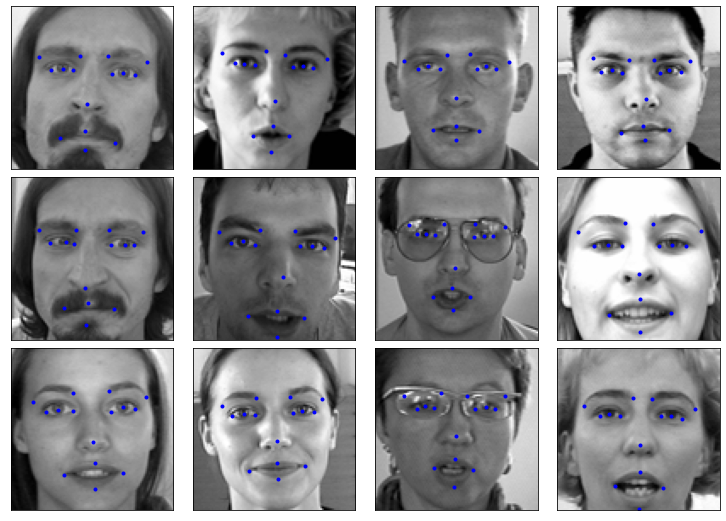

In [10]:
#Display samples of the dataset.
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    plot_face_pts(X_train[i], Y_train[i])

plt.show()

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,random_state = 2,test_size = 0.1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [13]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Conv2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

In [14]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','acc'])

In [15]:
history = model.fit(x_train,y_train,batch_size=128, epochs=100,validation_data=(x_val,y_val))

Train on 6344 samples, validate on 705 samples
Epoch 1/100
6344/6344 [==============================] - 14s 2ms/step - loss: 184.2453 - mae: 8.0118 - acc: 0.3679 - val_loss: 201.5495 - val_mae: 12.9931 - val_acc: 0.6199
Epoch 2/100
6344/6344 [==============================] - 6s 905us/step - loss: 24.1258 - mae: 3.7826 - acc: 0.4068 - val_loss: 173.5216 - val_mae: 11.9821 - val_acc: 0.6199
Epoch 3/100
6344/6344 [==============================] - 6s 901us/step - loss: 20.3731 - mae: 3.4416 - acc: 0.4302 - val_loss: 131.2130 - val_mae: 10.2712 - val_acc: 0.6199
Epoch 4/100
6344/6344 [==============================] - 6s 904us/step - loss: 17.3517 - mae: 3.1734 - acc: 0.5052 - val_loss: 85.8613 - val_mae: 8.0886 - val_acc: 0.6199
Epoch 5/100
6344/6344 [==============================] - 6s 901us/step - loss: 16.1722 - mae: 3.0581 - acc: 0.5601 - val_loss: 31.1399 - val_mae: 4.4959 - val_acc: 0.6199
Epoch 6/100
6344/6344 [==============================] - 6s 909us/step - loss: 14.0556 - mae

In [16]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'val_acc', 'loss', 'mae', 'acc'])


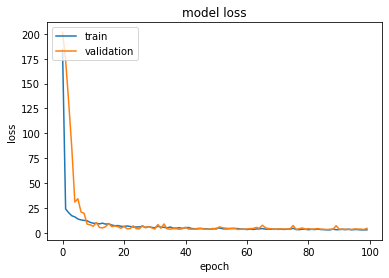

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

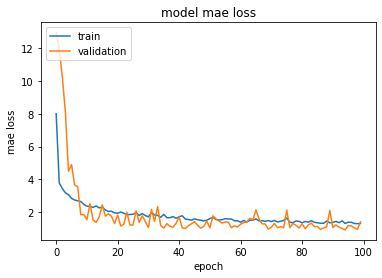

In [18]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae loss')
plt.ylabel('mae loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
X_t = []
for i in range(0,test.shape[0]):
    #make a list of pixel values for every image, and append them into X
    pixel_values_t = test['Image'][i].split(' ')
    pixel_values_t = ['0' if x == '' else x for x in pixel_values_t]
    X_t.append(pixel_values_t)
    
X_t_arr = np.array(X_t,dtype = 'float')
x_test = X_t_arr.reshape(-1,96,96,1) 
x_test = x_test/255.0

In [20]:
pred = model.predict(x_test)

In [21]:
print(pred[0])

[66.161964 37.80825  30.466408 36.98571  59.852924 38.266476 73.44816
 38.462902 36.77989  37.628094 22.918571 37.4364   57.866795 26.344915
 79.50324  27.21424  39.87839  25.490759 16.167501 26.60851  49.814003
 54.42268  64.25514  75.25073  31.718803 74.860794 48.4275   69.71149
 48.40908  86.67987 ]


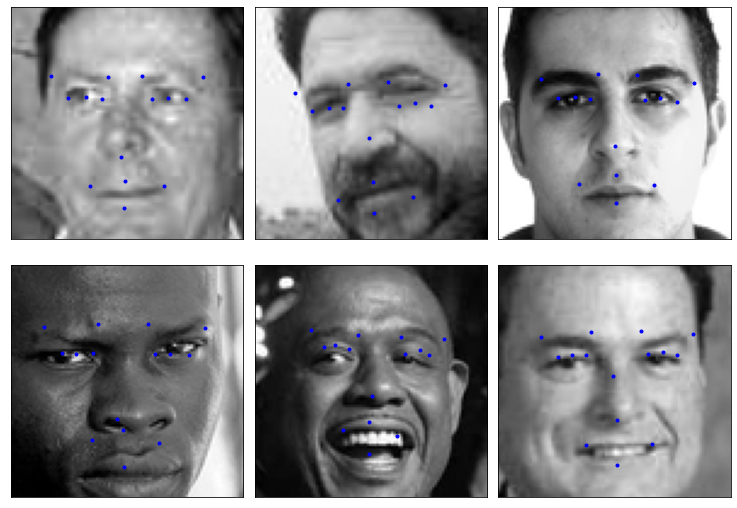

In [22]:
#Display predicted samples of the dataset.
fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i, f in enumerate(range(39,45)):
    ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
    plot_face_pts(x_val[f], pred[f])

plt.show()

In [23]:
lookid_list = list(lookup['FeatureName']) 
imageID = list(lookup['ImageId']-1) 
pre_list = list(pred)

rowid = lookup['RowId'] 
rowid=list(rowid)

feature = [] 
for f in list(lookup['FeatureName']): 
    feature.append(lookid_list.index(f))

preded = []
for x,y in zip(imageID,feature): 
    preded.append(pre_list[x][y])

rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')

submission = pd.concat([rowid,loc],axis = 1)


In [24]:
submission.head()

,RowId,Location
0,1,66.161964
1,2,37.808250
2,3,30.466408
3,4,36.985710
4,5,59.852924


In [25]:
submission.to_csv('f_key_submission.csv',index = False)

In [26]:
model.save('facial_kepoints_detection.h5')